# Anime Analysis 

In [128]:
import pandas as pd
import numpy as np
import re

In [129]:
missing_values = ["na", "['na']", "['nan']"]
df = pd.read_csv('./anime_list1.csv', dtype = {'Votes':'float32', 'Episodes':'float16', 'Duration':'float16', 'Completed':'bool'}, na_values=missing_values, sep=';')

In [130]:
def split_list(stringy):
    if stringy != np.NaN:
        stringy = str(stringy).replace("'", "").replace("[", "").replace( "]", "")
        return str(stringy).split(', ')
    else:
        return np.NaN

def nullifier(each):
    if 'nan' in each:
        return np.NaN    
    else:
        return each
    
df['Studio'] = df['Studio'].apply(split_list).apply(nullifier)
df['Tags'] = df['Tags'].apply(split_list).apply(nullifier)

df['Format'] = df['Format'].astype('category')
df['Start Year'] = df['Start Year'].astype('category')
df['End Year'] = df['End Year'].astype('category')

def formatter(each):
    if str(each) == 'nan':
        return np.NaN
    else:
        return '%2.0f' % float(each)

df['Start Year'] = df['Start Year'].apply(formatter)
df['End Year'] = df['End Year'].apply(formatter)
df['Votes'] = df['Votes'].apply(formatter)
df['Episodes'] = df['Episodes'].apply(formatter)
df['Duration'] = df['Duration'].apply(formatter)

In [131]:
#df.to_csv("anime_list1.csv", sep=';', index=False)

In [132]:
df

,Rating,Votes,Title,Alt Title,Format,Episodes,Duration,Start Year,End Year,Studio,Tags,Description
0,9.410,73986,Fullmetal Alchemist: Brotherhood,Hagane no Renkinjutsushi: Full Metal Alchemist,TV,64,NaN,2009,2010,[Bones],"[Action, Adventure, Drama, Fantasy, Mystery, S...",The foundation of alchemy is based on the law ...
1,9.356,29247,your name.,Kimi no Na wa.,Movie,1,107,2016,2016,[CoMix Wave Inc.],"[Drama, Romance, Body Swapping, Opposites Attr...",Mitsuha and Taki are two total strangers livin...
2,9.334,19592,A Silent Voice,Koe no Katachi,Movie,1,130,2016,2016,[Kyoto Animation],"[Drama, Melancholy, School Life, Bullying, Mat...","After transferring into a new school, a deaf g..."
3,9.320,11195,Haikyuu!! Karasuno High School vs Shiratorizaw...,Haikyuu!! 3rd Season: Karasuno High vs. Shira...,TV,10,NaN,2016,2016,[Production I.G],"[Shounen, Sports, Animeism, School Club, Schoo...","Picking up where the second season ended, the ..."
4,9.296,18788,My Hero Academia 3,Boku no Hero Academia 3,TV,25,NaN,2018,2018,[Bones],"[Action, Comedy, Drama, Sci Fi, Shounen, Super...",Third season of My Hero Academia.
5,9.288,2939,Mob Psycho 100 II,NaN,TV,12,NaN,2019,NaN,[Bones],"[Action, Comedy, Shounen, Psychic Powers, Psy...",Second Season of Mob Psycho 100.
6,9.274,15322,Haikyuu!! Second Season,NaN,TV,25,NaN,2015,2016,[Production I.G],"[Shounen, Sports, School Club, School Life, To...","After losing to Aoba Johsai at the Inter-High,..."
7,9.266,5375,Gintama Kanketsu-hen: Yorozuya yo Eien Nare,Gintama The Movie: The Final Chapter - Be Fore...,Movie,1,111,2013,2013,[Sunrise],"[Action, Comedy, Drama, Sci Fi, Shounen, Alien...","While watching a movie, Gintoki comes upon a ""..."
8,9.264,29623,My Hero Academia 2,Boku no Hero Academia 2,TV,25,NaN,2017,2017,[Bones],"[Action, Comedy, Drama, Sci Fi, Shounen, Schoo...",In a world where eighty percent of the populat...
9,9.262,6192,Gintama (2015),Gintama°,TV,51,NaN,2015,2016,[BN Pictures],"[Action, Comedy, Drama, Sci Fi, Shounen, Alien...",Fourth season of Gintama.


In [169]:
df['Votes'].astype(float).min()

10.0

In [80]:
df.dtypes

Rating          float64
Votes            object
Title            object
Alt Title        object
Format         category
Episodes         object
Duration         object
Start Year     category
End Year       category
Completed          bool
Studio           object
Tags             object
Description      object
dtype: object

In [150]:
df['Format'].value_counts()

TV             4215
Movie          2279
OVA            1971
Web            1129
Music Video    1124
DVD Special     776
Other           646
TV Special      541
Name: Format, dtype: int64

Text(0, 0.5, 'Number of creations')

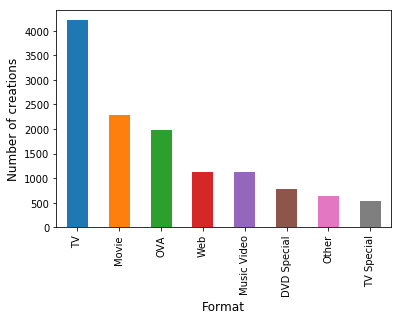

In [151]:
%matplotlib inline
ax = df['Format'].value_counts().plot(kind='bar')
ax.set_xlabel('Format', fontsize=12)
ax.set_ylabel('Number of Pieces', fontsize=12)

Text(0, 0.5, 'Number of Pieces')

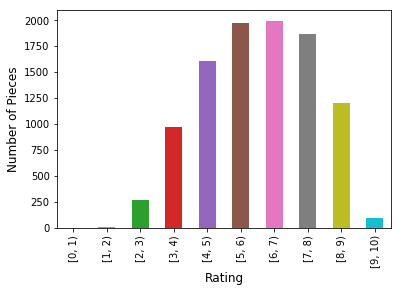

In [185]:
bins = range(0, 11)
ax = pd.cut(list(df['Rating']), bins, right=False).value_counts().plot(kind='bar')
ax.set_xlabel('Rating', fontsize=12)
ax.set_ylabel('Number of Pieces', fontsize=12)

Text(0, 0.5, 'Number of Pieces')

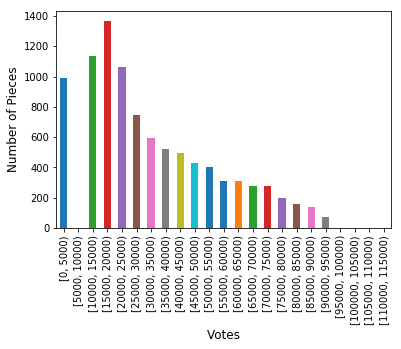

In [200]:
bins = range(0, 120000, 5000)
ax = pd.cut(list(df['Votes']), bins, right=False).value_counts().plot(kind='bar')
ax.set_xlabel('Votes', fontsize=12)
ax.set_ylabel('Number of Pieces', fontsize=12)

In [228]:
df.loc[df['Rating'] >= 7, 'Start Year'].value_counts().filter(regex = '^[1-9]\d*$')

2018    221
2017    219
2016    218
2014    205
2015    197
2013    183
2012    177
2011    164
2010    157
2009    154
2008    148
2007    132
2006    118
2005    100
2004     80
2003     64
2001     60
2002     53
2019     46
1999     45
1995     36
1998     36
1996     35
1997     33
2000     32
1994     24
1993     22
1992     20
1988     18
1989     17
       ... 
1926      0
1946      0
2026      0
1948      0
1963      0
2022      0
2021      0
2020      0
1976      0
2023      0
1972      0
1969      0
1968      0
1967      0
1966      0
1965      0
1962      0
1949      0
1961      0
1960      0
1959      0
1958      0
1957      0
1956      0
1955      0
1954      0
1953      0
1952      0
1950      0
1907      0
Name: Start Year, Length: 103, dtype: int64